# Project: Wrangling and Analyze Data

In [5]:
# Importing all  the required libraries

import pandas as pd
import wptools
import os
import requests
from PIL import Image
from io import BytesIO
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [6]:
df_tae = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
df_tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
# We Create a directory if it doesn't already exist
folder_name = 'image_predictions'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [10]:
os.listdir(folder_name)

['image-predictions.tsv']

In [11]:
df_images = pd.read_csv('image_predictions\image-predictions.tsv' , sep ="\t")

In [12]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [130]:
#### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tae.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        #except tweepy.TweepError as e:
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [33]:
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
data = [ ]
for line in lines:
    data.append(json.loads(line))

df_json = pd.DataFrame(data)

In [34]:
df_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### First Data Assessment  - Twitter Archived Enhanced

In [35]:
# Access the First Dataset
df_tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [36]:
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [37]:
df_tae.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
903,758405701903519748,NaN,NaN,2016-07-27 20:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He falls asleep wherever he want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758405701...,10,10,Odie,None,None,None,None
1065,740711788199743490,NaN,NaN,2016-06-09 01:07:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing the touchdown of a pupn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740711788...,9,10,None,None,None,None,None
557,803380650405482500,NaN,NaN,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sonny. He's an in-home movie critic. That...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803380650...,12,10,Sonny,None,None,None,None
1015,747103485104099331,NaN,NaN,2016-06-26 16:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys... I said DOGS with ""shark qualities"" or ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/747103485...,11,10,None,None,None,None,None
1982,672968025906282496,NaN,NaN,2015-12-05 02:37:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672968025...,11,10,Gustaf,None,None,None,None


In [38]:
df_tae.shape

(2356, 17)

In [39]:
df_tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [40]:
df_tae.duplicated().sum()

0

In [41]:
df_tae.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

<AxesSubplot:>

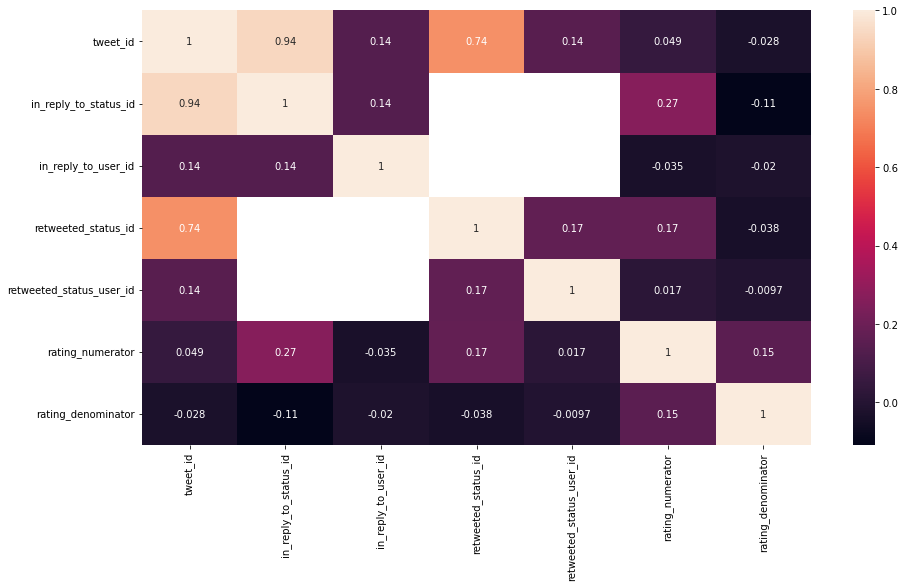

In [42]:
f, ax = plt.subplots(figsize = (15,8))
df_corr = df_tae.corr()
sns.heatmap(df_corr, annot = True)

#### Second Data Assessment  - Images Prediction

In [43]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [44]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
869,697616773278015490,https://pbs.twimg.com/media/Ca5uv7RVAAA_QEg.jpg,1,Lhasa,0.521931,True,Shih-Tzu,0.403451,True,Tibetan_terrier,0.039912,True
119,668171859951755264,https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg,1,Chihuahua,0.664834,True,cowboy_boot,0.060343,False,giant_panda,0.059838,False
1098,720389942216527872,https://pbs.twimg.com/media/Cf9W1J-UMAErahM.jpg,1,Pembroke,0.873977,True,Cardigan,0.043339,True,Eskimo_dog,0.019197,True
1072,716791146589110272,https://pbs.twimg.com/media/CfKNvU8WsAAvI9Z.jpg,1,Pomeranian,0.468751,True,seat_belt,0.154652,False,golden_retriever,0.125017,True
615,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False


In [46]:
df_images.shape

(2075, 12)

In [47]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [48]:
df_images.duplicated().sum()

0

In [49]:
df_images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

<AxesSubplot:>

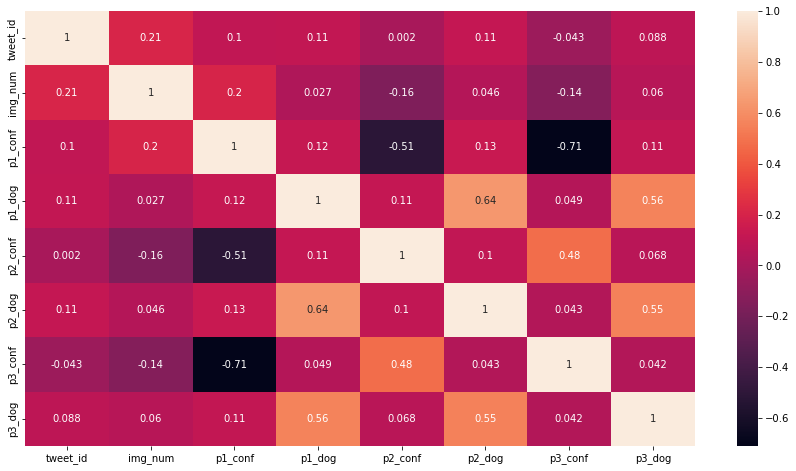

In [50]:
f, ax = plt.subplots(figsize = (15,8))
df_corr = df_images.corr()
sns.heatmap(df_corr, annot = True)

### Third Dataset Asessment  - JSON Data

In [51]:
df_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [52]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [53]:
df_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1970,Sat Dec 05 20:41:29 +0000 2015,673240798075449344,673240798075449344,Magical floating dog here. Very calm. Always h...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673240782124548096, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1510,False,False,False,False,en,NaN,NaN,NaN,NaN
1541,Tue Jan 19 21:18:22 +0000 2016,689557536375177216,689557536375177216,Downright majestic af 12/10 https://t.co/WFh2F...,False,"[0, 51]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689557528733163520, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2257,False,False,False,False,en,NaN,NaN,NaN,NaN
2037,Tue Dec 01 04:33:59 +0000 2015,671547767500775424,671547767500775424,This is Marley. She chews shoes then feels ext...,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671547764132704256, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1444,False,False,False,False,en,NaN,NaN,NaN,NaN
60,Thu Jun 29 00:27:25 +0000 2017,880221127280381952,880221127280381952,Meet Jesse. He's a Fetty Woof. His tongue ejec...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 880221119067770882, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,27640,False,False,False,False,en,NaN,NaN,NaN,NaN
1878,Thu Dec 10 17:37:00 +0000 2015,675006312288268288,675006312288268288,Say hello to Mollie. This pic was taken after ...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675006303748665346, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1057,False,False,False,False,en,NaN,NaN,NaN,NaN


In [54]:
df_json.shape

(2354, 31)

In [55]:
df_json.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


<AxesSubplot:>

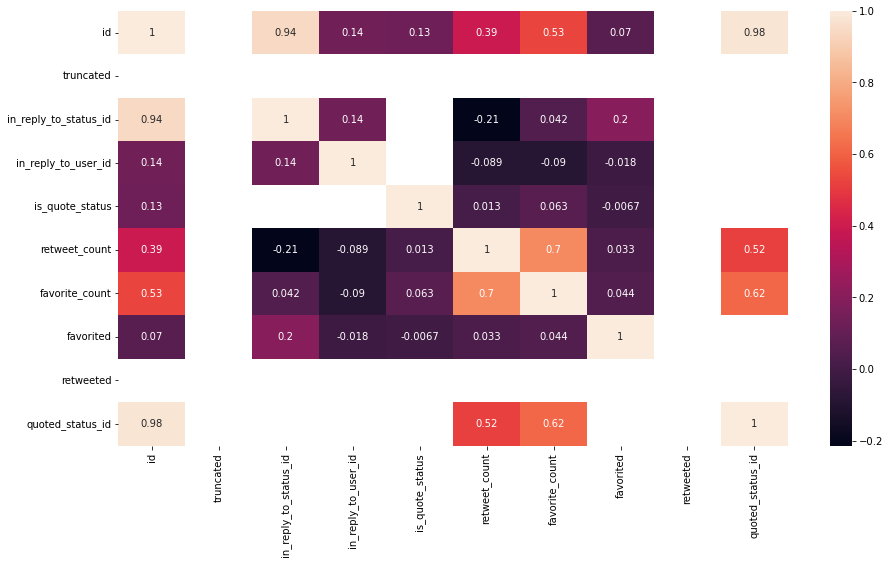

In [56]:
f, ax = plt.subplots(figsize = (15,8))
df_corr = df_json.corr()
sns.heatmap(df_corr, annot = True)

#### Quality Issues
##### `twitter_archive_enhanced` , `image_predictions` , `tweet_json tables
1. There are rows that there are non-null values in the retweet_status_id column which are duplicates of the tweet id.
2. There are redundant columns like "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",
   retweeted_status_user_id,retweeted_status_timestamp in both the Twitter archived enhanced data and the JSON file
3. The 'timestamp' column and the 'created at' column are defined as objects instead of DateTime.
4. There are missing values in the 'expanded_url' column.
5. The datatype of both the rating numerator and denominator is integer instead of float, thereby making the extraction incorrect.
6. Some values in the rating_denominator column are above 10
7. Some values in the rating_denominator column are below 10
8. Some of the column names are not descriptive enough and need to be renamed. e.g created_at should be renamed to timestamp and the 'id' should be renamed to 'tweet_id' to ensure name consistency with the other tables.
9. Incorrect names of some dogs

#### Tidiness Issues
##### `twitter_archive_enhanced` , `image_predictions` , `tweet_json tables
1. There is a need to merge the dog stages columns as a single column named stages.
2. There is a need to join the entire dataset tables to obtain a robust dataset to perform our analysis.
.hy 5uj

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [57]:
# Make copies of original pieces of data
df_tae_clean = df_tae.copy()
df_images_clean = df_images.copy()
df_json_clean = df_json.copy()

### Issue #1: 
We realized that rows that there are non null values in the retweet_status_id column which are duplicate of the tweet id.

#### Define


We drop the rows that are not null under the retweet_status_id column

#### Code

In [70]:
print(df_tae_clean['retweeted_status_id'].notnull().sum())
#tweets_copy = tweets_copy[tweets_copy['retweeted_status'].isna()]
# Below checks the retweets have been effectively removed.
#tweets_copy['retweeted_status'].notnull().sum(

0


In [71]:
df_tae_clean = df_tae_clean[df_tae_clean['retweeted_status_id'].isna()]

In [72]:
df_tae_clean['retweeted_status_id'].notnull().sum()

0

#### Test

In [73]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [74]:
df_tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2: 
There exist redundant columns like columns like      'in_reply_to_status_id','in_reply_to_user_id',retweeted_status_id, <br/>
    retweeted_status_user_id,retweeted_status_timestamp.

#### Define:
Drop The Columns That Are Not Required For My Analysis like 'in_reply_to_status_id','in_reply_to_user_id', retweeted_status_id,
retweeted_status_user_id,retweeted_status_timestamp.

#### Code

In [75]:
df_tae_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [76]:
df_json_clean.drop(['id_str','extended_entities','in_reply_to_status_id','in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user','geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'retweeted_status','quoted_status_id', 'quoted_status_id_str', 'quoted_status'] , axis = 1, inplace = True)
#df_json_clean.drop(['id_str','extended_entities','in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [77]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          2354 non-null   object
 1   id                  2354 non-null   int64 
 2   full_text           2354 non-null   object
 3   truncated           2354 non-null   bool  
 4   display_text_range  2354 non-null   object
 5   entities            2354 non-null   object
 6   source              2354 non-null   object
 7   favorite_count      2354 non-null   int64 
 8   favorited           2354 non-null   bool  
 9   lang                2354 non-null   object
dtypes: bool(2), int64(2), object(6)
memory usage: 151.8+ KB


In [78]:
df_json_clean.head(3)

,created_at,id,full_text,truncated,display_text_range,entities,source,favorite_count,favorited,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",39467,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",33819,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",25461,False,en


In [79]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [80]:
df_tae_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Issue #3: 
- The 'timestamp' column and 'created at' column are defined as an object instead of datetime

#### Define
- Convert the datatype of the 'timestamp' column from Object to datetime
- Convert the datatype of the 'created at' column from Object to datetime

#### Code

In [81]:
df_tae_clean['timestamp'] = pd.to_datetime(df_tae_clean['timestamp'])

In [82]:
df_json_clean['created_at'] = pd.to_datetime(df_json_clean['created_at'])

#### Test

In [83]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [84]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2354 non-null   datetime64[ns, UTC]
 1   id                  2354 non-null   int64              
 2   full_text           2354 non-null   object             
 3   truncated           2354 non-null   bool               
 4   display_text_range  2354 non-null   object             
 5   entities            2354 non-null   object             
 6   source              2354 non-null   object             
 7   favorite_count      2354 non-null   int64              
 8   favorited           2354 non-null   bool               
 9   lang                2354 non-null   object             
dtypes: bool(2), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 151.8+ KB


### Issue #4: 

- There are missing values in the 'expanded_url' column.

#### Define

Remove those rows with missing values

#### Code

In [85]:
df_tae_clean.dropna(subset = ['expanded_urls'], inplace = True)

#### Test

In [86]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #5: 

The Datatype of both the rating numerator and denominator are in integer insted of float.

#### Define

Convert the Datatype of both the rating numerator and denominator from int to float

#### Code

In [87]:
df_tae_clean['rating_numerator'] = df_tae_clean['rating_numerator'].astype(float)

In [88]:
df_tae_clean['rating_denominator'] = df_tae_clean['rating_denominator'].astype(float)

#### Test

In [89]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   float64            
 6   rating_denominator  2117 non-null   float64            
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### Issue #6: 

Some values in the rating_denomminator column are above 10

#### Define

Convert the rating_denominator to 10 for all values greater than 10 in the column

#### Code

In [90]:
df_tae_clean.loc[df_tae['rating_denominator'] > 10.0] = 10.0

#### Test

In [91]:
df_tae_clean[['tweet_id','rating_denominator']].sort_values('rating_denominator', ascending=False).nlargest(5, 'rating_denominator')

,tweet_id,rating_denominator
0,892420643555336193,10.0
1630,684538444857667585,10.0
1644,683852578183077888,10.0
1643,683857920510050305,10.0
1642,684097758874210310,10.0


### Issue #7: 

Some values in the rating_denomminator column are below 10

#### Define

Convert the rating_denominator to 10 for all values less than 10 in the column

#### Code

In [92]:
df_tae_clean.loc[df_tae['rating_denominator'] < 10.0] = 10.0

#### Test

In [93]:
df_tae_clean[['tweet_id','rating_denominator']].sort_values('rating_denominator', ascending=False).nsmallest(5, 'rating_denominator')

,tweet_id,rating_denominator
0,892420643555336193,10.0
1631,684481074559381504,10.0
1645,683849932751646720,10.0
1644,683852578183077888,10.0
1643,683857920510050305,10.0


### Issue #8: 

Some of the column names are not descriptive enough and needs to be renamed. e.g created_at should be renamed to timestamp      and the 'id' should be renamed to to 'tweet_id' to ensure name consistency with the other table.

#### Define

Rename some columns in our datasets to ensure name consistency as well as better description.

#### Define

In [94]:
df_images_clean.rename(columns={"jpg_url":"picture_url", "img_num":"num_of_pictures","p1":"prediction_num_1", "p1_conf":"prediction_conf_num_1","p1_dog":"prediction_num_1_is_dog_breed", "p2":"prediction_num_2", "p2_conf":"prediction_conf_num_2","p2_dog":"prediction_num_2_is_dog_breed", "p3":"prediction_num_3", "p3_conf":"prediction_conf_num_3","p3_dog":"prediction_num_3_is_dog_breed"} ,inplace = True)

In [95]:
df_json_clean.rename(columns={"created_at":"timestamp"} ,inplace = True)

#### Test

In [96]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2075 non-null   int64  
 1   picture_url                    2075 non-null   object 
 2   num_of_pictures                2075 non-null   int64  
 3   prediction_num_1               2075 non-null   object 
 4   prediction_conf_num_1          2075 non-null   float64
 5   prediction_num_1_is_dog_breed  2075 non-null   bool   
 6   prediction_num_2               2075 non-null   object 
 7   prediction_conf_num_2          2075 non-null   float64
 8   prediction_num_2_is_dog_breed  2075 non-null   bool   
 9   prediction_num_3               2075 non-null   object 
 10  prediction_conf_num_3          2075 non-null   float64
 11  prediction_num_3_is_dog_breed  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memo

In [97]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2354 non-null   datetime64[ns, UTC]
 1   id                  2354 non-null   int64              
 2   full_text           2354 non-null   object             
 3   truncated           2354 non-null   bool               
 4   display_text_range  2354 non-null   object             
 5   entities            2354 non-null   object             
 6   source              2354 non-null   object             
 7   favorite_count      2354 non-null   int64              
 8   favorited           2354 non-null   bool               
 9   lang                2354 non-null   object             
dtypes: bool(2), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 151.8+ KB


In [98]:
df_json_clean.rename(columns={"id":"tweet_id"} ,inplace = True)

In [99]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2354 non-null   datetime64[ns, UTC]
 1   tweet_id            2354 non-null   int64              
 2   full_text           2354 non-null   object             
 3   truncated           2354 non-null   bool               
 4   display_text_range  2354 non-null   object             
 5   entities            2354 non-null   object             
 6   source              2354 non-null   object             
 7   favorite_count      2354 non-null   int64              
 8   favorited           2354 non-null   bool               
 9   lang                2354 non-null   object             
dtypes: bool(2), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 151.8+ KB


### Issue #9

Incorrect values of dog name in the dog column.

#### Define

Remove all the names that are not dogs

#### Code

In [100]:
wateva = df_tae_clean[df_tae_clean.name.str.contains('^[a-z]', na =True )]

In [101]:
df_tae_clean.drop(wateva.index, inplace = True)

#### Test

In [102]:
df_tae_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


### Tidiness Issues

### Issue #1:

There is a need to merge the dog stages columns as a single column named stages.

#### Define

We merge the dog stages columns as a single column named stages.

#### Code 

In [103]:
df_tae_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None


In [104]:
df_tae_clean.doggo.replace('None', '', inplace=True)

In [105]:
df_tae_clean.floofer.replace('None', '', inplace=True)

In [106]:
df_tae_clean.pupper.replace('None', '', inplace=True)

In [107]:
df_tae_clean.puppo.replace('None', '', inplace=True)

In [108]:
df_tae_clean['stage'] = df_tae_clean.doggo + df_tae_clean.floofer + df_tae_clean.pupper + df_tae_clean.puppo
df_tae_clean.loc[df_tae_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_tae_clean.loc[df_tae_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_tae_clean.loc[df_tae_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [109]:
df_tae_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,,,


In [110]:
df_tae_clean.stage.value_counts()

                 1674
pupper            211
doggo              70
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [111]:
df_tae_clean.drop(labels = ["doggo", "floofer", "pupper", "puppo"], axis = 1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,
...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6.0,10.0,None,
2343,666073100786774016,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10.0,10.0,None,
2344,666071193221509120,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9.0,10.0,None,
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,


In [112]:
df_tae_clean.stage.value_counts()

                 1674
pupper            211
doggo              70
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [113]:
df_tae_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,


In [114]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1998 non-null   int64  
 1   timestamp           1998 non-null   object 
 2   source              1998 non-null   object 
 3   text                1998 non-null   object 
 4   expanded_urls       1998 non-null   object 
 5   rating_numerator    1998 non-null   float64
 6   rating_denominator  1998 non-null   float64
 7   name                1998 non-null   object 
 8   doggo               1998 non-null   object 
 9   floofer             1998 non-null   object 
 10  pupper              1998 non-null   object 
 11  puppo               1998 non-null   object 
 12  stage               1998 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 218.5+ KB


In [115]:
df_images_clean.head(2)

,tweet_id,picture_url,num_of_pictures,prediction_num_1,prediction_conf_num_1,prediction_num_1_is_dog_breed,prediction_num_2,prediction_conf_num_2,prediction_num_2_is_dog_breed,prediction_num_3,prediction_conf_num_3,prediction_num_3_is_dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [116]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2075 non-null   int64  
 1   picture_url                    2075 non-null   object 
 2   num_of_pictures                2075 non-null   int64  
 3   prediction_num_1               2075 non-null   object 
 4   prediction_conf_num_1          2075 non-null   float64
 5   prediction_num_1_is_dog_breed  2075 non-null   bool   
 6   prediction_num_2               2075 non-null   object 
 7   prediction_conf_num_2          2075 non-null   float64
 8   prediction_num_2_is_dog_breed  2075 non-null   bool   
 9   prediction_num_3               2075 non-null   object 
 10  prediction_conf_num_3          2075 non-null   float64
 11  prediction_num_3_is_dog_breed  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memo

In [117]:
df_json_clean.head(2)

,timestamp,tweet_id,full_text,truncated,display_text_range,entities,source,favorite_count,favorited,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",39467,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",33819,False,en


In [118]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2354 non-null   datetime64[ns, UTC]
 1   tweet_id            2354 non-null   int64              
 2   full_text           2354 non-null   object             
 3   truncated           2354 non-null   bool               
 4   display_text_range  2354 non-null   object             
 5   entities            2354 non-null   object             
 6   source              2354 non-null   object             
 7   favorite_count      2354 non-null   int64              
 8   favorited           2354 non-null   bool               
 9   lang                2354 non-null   object             
dtypes: bool(2), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 151.8+ KB


In [119]:
df_json_clean = df_json_clean[['tweet_id', 'timestamp', 'full_text', 'display_text_range', 'source', 'favorite_count', 'favorited', 'lang']]
df_json_clean

,tweet_id,timestamp,full_text,display_text_range,source,favorite_count,favorited,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...",39467,False,en
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",33819,False,en
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r...",25461,False,en
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,"[0, 79]","<a href=""http://twitter.com/download/iphone"" r...",42908,False,en
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",41048,False,en
...,...,...,...,...,...,...,...,...
2349,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,"[0, 120]","<a href=""http://twitter.com/download/iphone"" r...",111,False,en
2350,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,"[0, 137]","<a href=""http://twitter.com/download/iphone"" r...",311,False,en
2351,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,"[0, 130]","<a href=""http://twitter.com/download/iphone"" r...",128,False,en
2352,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,"[0, 139]","<a href=""http://twitter.com/download/iphone"" r...",132,False,en


### Issue #2

There is a need to join the entire dataset tables to obtain a robust dataset to perform our analysis.

#### Define

Merge the entire dataset tables to obtain a robust dataset to perform our analysis

#### Code

In [120]:
#df_tae_clean.to_csv('twitter_archive_master.csv')

In [121]:
total = pd.merge(df_tae_clean, df_images_clean, on = 'tweet_id')

In [122]:
total_dataset = pd.merge(total, df_json_clean, on = 'tweet_id')

#### Test

In [123]:
total_dataset

,tweet_id,timestamp_x,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,prediction_num_3,prediction_conf_num_3,prediction_num_3_is_dog_breed,timestamp_y,full_text,display_text_range,source_y,favorite_count,favorited,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,...,banana,0.076110,False,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...",39467,False,en
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,...,papillon,0.068957,True,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",33819,False,en
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,...,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r...",25461,False,en
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,...,spatula,0.040836,False,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,"[0, 79]","<a href=""http://twitter.com/download/iphone"" r...",42908,False,en
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,...,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",41048,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,666082916733198337,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6.0,10.0,None,,,...,French_bulldog,0.048960,True,2015-11-16 02:38:37+00:00,Here we have a well-established sunblockerspan...,"[0, 125]","<a href=""http://twitter.com/download/iphone"" r...",121,False,en
1877,666073100786774016,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10.0,10.0,None,,,...,Ibizan_hound,0.097471,True,2015-11-16 01:59:36+00:00,Let's hope this flight isn't Malaysian (lol). ...,"[0, 137]","<a href=""http://twitter.com/download/iphone"" r...",335,False,en
1878,666071193221509120,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9.0,10.0,None,,,...,Pekinese,0.109454,True,2015-11-16 01:52:02+00:00,Here we have a northern speckled Rhododendron....,"[0, 137]","<a href=""http://twitter.com/download/iphone"" r...",154,False,en
1879,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,,,...,Doberman,0.154629,True,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,"[0, 120]","<a href=""http://twitter.com/download/iphone"" r...",111,False,en


In [124]:
total_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1881 non-null   int64              
 1   timestamp_x                    1881 non-null   object             
 2   source_x                       1881 non-null   object             
 3   text                           1881 non-null   object             
 4   expanded_urls                  1881 non-null   object             
 5   rating_numerator               1881 non-null   float64            
 6   rating_denominator             1881 non-null   float64            
 7   name                           1881 non-null   object             
 8   doggo                          1881 non-null   object             
 9   floofer                        1881 non-null   object             
 10  pupper                  

In [125]:
total_dataset.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [126]:
complete_dataset = pd.read_csv('twitter_archive_master.csv')
complete_dataset.head(3)

,tweet_id,timestamp_x,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,prediction_num_3,prediction_conf_num_3,prediction_num_3_is_dog_breed,timestamp_y,full_text,display_text_range,source_y,favorite_count,favorited,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,...,banana,0.076110,False,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","<a href=""http://twitter.com/download/iphone"" r...",39467,False,en
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,...,papillon,0.068957,True,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,"[0, 138]","<a href=""http://twitter.com/download/iphone"" r...",33819,False,en
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,...,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]","<a href=""http://twitter.com/download/iphone"" r...",25461,False,en


### Insights:

##### 1. What is the Correlation between the attributes in the master Dataset.

<AxesSubplot:>

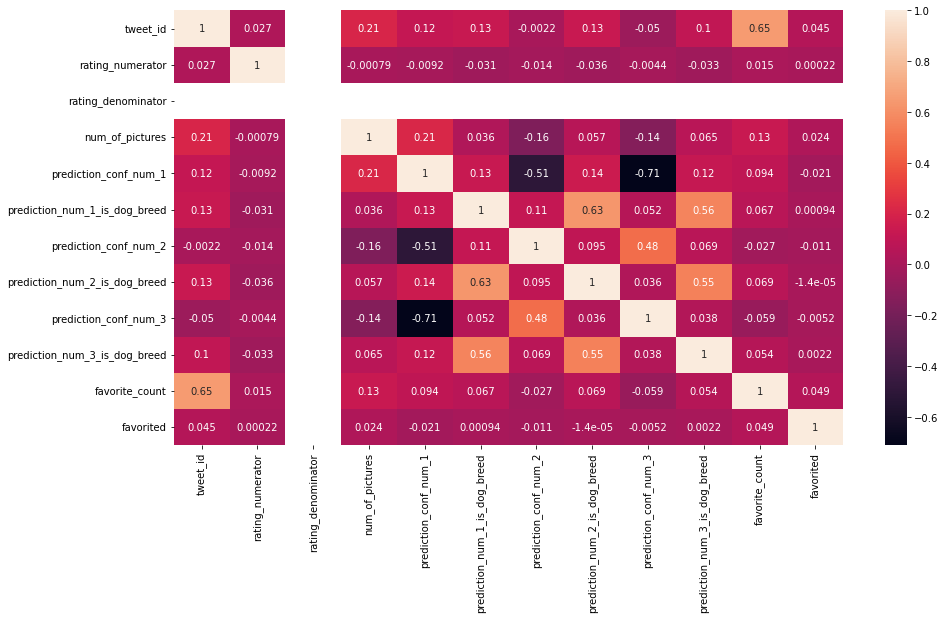

In [127]:
f, ax = plt.subplots(figsize = (15,8))
df_corr = complete_dataset.corr()
sns.heatmap(df_corr, annot = True)

##### 2. What Tweet ID has the most Favourite Count?

In [128]:
complete_dataset[['tweet_id','favorite_count']].sort_values('favorite_count', ascending=False).nlargest(10, 'favorite_count')

,tweet_id,favorite_count
304,822872901745569793,132810
753,744234799360020481,131075
56,879415818425184262,107956
393,807106840509214720,107015
106,866450705531457537,106827
327,819004803107983360,95450
91,870374049280663552,85011
395,806629075125202948,75639
784,739238157791694849,75163
261,830583320585068544,73397


The Tweet ID with the most Favourite Count is <b>822872901745569793</b>.

##### 3. What Tweet ID has the Highest Rating?

In [129]:
complete_dataset[['tweet_id','rating_numerator']].sort_values('rating_numerator', ascending=False).nlargest(10, 'rating_numerator')

,tweet_id,rating_numerator
712,749981277374128128,1776.0
1640,670842764863651840,420.0
494,786709082849828864,75.0
544,778027034220126208,27.0
1319,680494726643068929,26.0
562,774314403806253056,14.0
143,856526610513747968,14.0
540,778408200802557953,14.0
149,854120357044912130,14.0
35,884441805382717440,14.0


The Tweet ID with the Highest Rating is <b>749981277374128128</b>.

##### 4. How many languages are there in the entire Dataset

In [130]:
complete_dataset.lang.value_counts()

en    1874
nl       3
in       2
eu       1
et       1
Name: lang, dtype: int64

We have a <b>6 Languages</b> in the Entire Dataset

### Visualization

In [131]:
#fetching and combining different columns
tweet_id_and_favorite_count = complete_dataset[["tweet_id", "favorite_count"]]
tweet_id_rating_numerator = complete_dataset[["tweet_id", "rating_numerator"]]


sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.3)


#### 1. Top 10 Tweets Based On Their Favourite Count

C:\Users\User\miniconda3\envs\khalil\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


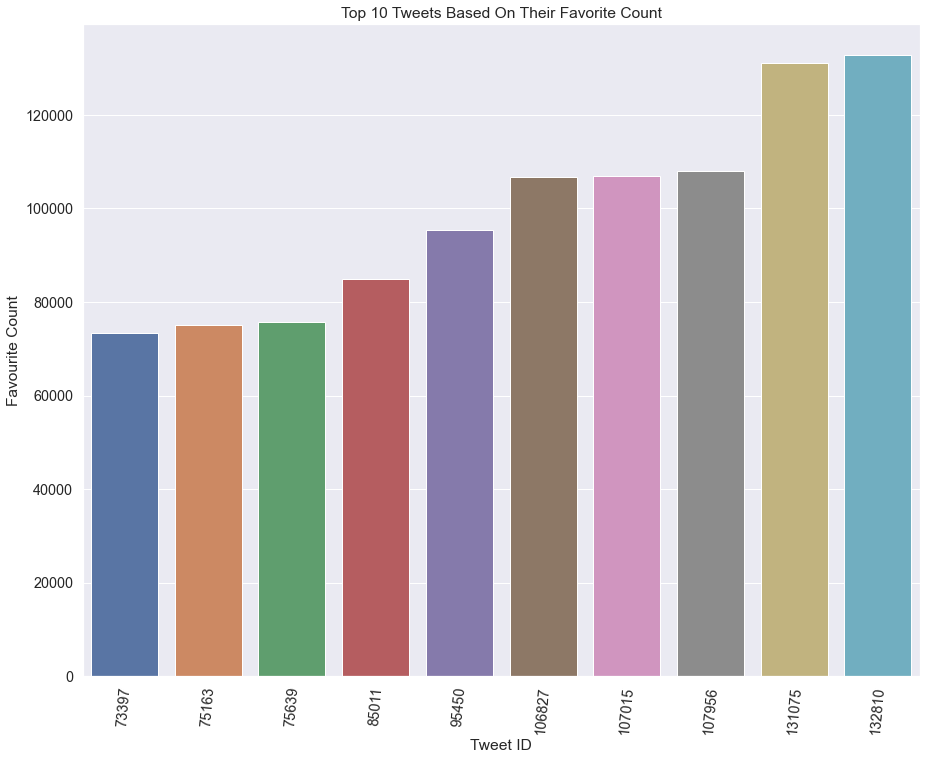

In [132]:
ax = sns.barplot(
    tweet_id_and_favorite_count.sort_values(by = "favorite_count", ascending=False).head(10).favorite_count, 
    tweet_id_and_favorite_count.sort_values(by = "favorite_count", ascending=False).head(10).favorite_count)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='Tweet ID', ylabel='Favourite Count', title = 'Top 10 Tweets Based On Their Favorite Count')
plt.show()

#### 2. Top 5 Tweets with the Highest Rating

C:\Users\User\miniconda3\envs\khalil\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


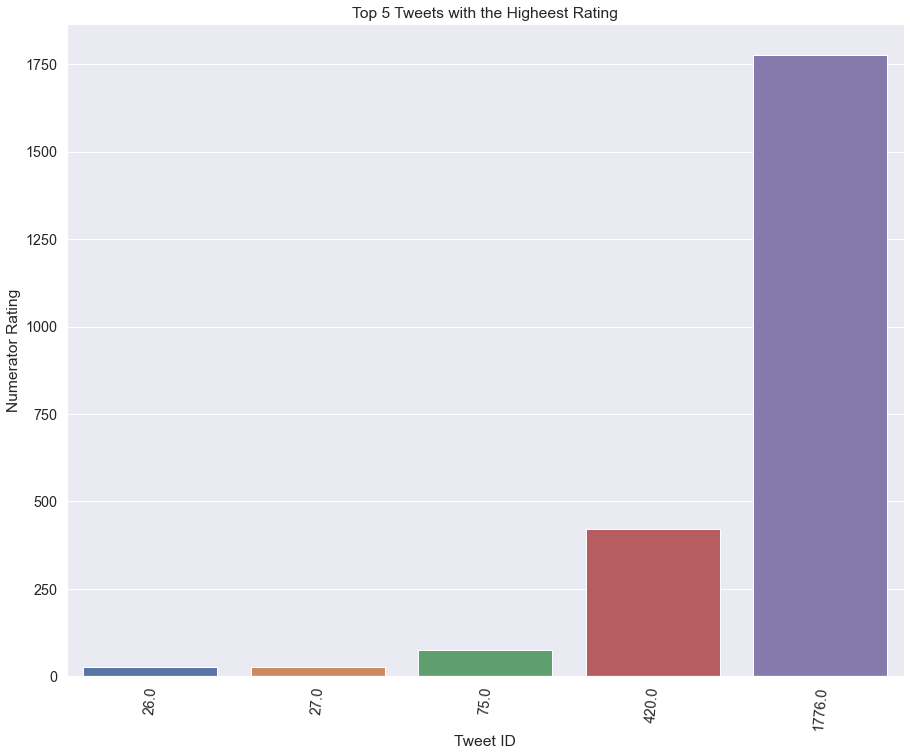

In [133]:
ax = sns.barplot(
    tweet_id_rating_numerator.sort_values(by = "rating_numerator", ascending=False).head(5).rating_numerator, 
    tweet_id_rating_numerator.sort_values(by = "rating_numerator", ascending=False).head(5).rating_numerator)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='Tweet ID', ylabel='Numerator Rating', title = 'Top 5 Tweets with the Higheest Rating')
plt.show()